# Open up the local disk

In [1]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
path_to_seismic = Path("C:\scratch\synthoseis_example\seismic__2023.67327713_example\seismic.zarr")

In [3]:
local_dataset = xr.open_dataset(filename_or_obj=path_to_seismic, engine="zarr")

In [4]:
local_dataset.seismic

<xarray.DataArray 'seismic' (iline: 300, xline: 300, twt: 1259)>
[113310000 values with dtype=float64]
Coordinates:
  * iline    (iline) int32 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
  * twt      (twt) int32 0 1 2 3 4 5 6 7 ... 1252 1253 1254 1255 1256 1257 1258
  * xline    (xline) int32 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299

# Compute attributes

In [5]:
from d2geo.attributes.CompleTrace import ComplexAttributes
from d2geo.attributes.SignalProcess import SignalProcess

In [6]:
complex_attribute = ComplexAttributes()
signal_process = SignalProcess()

In [7]:
result = complex_attribute.envelope(darray=local_dataset.seismic)
# result = signal_process.histogram_equalization(darray=local_dataset.seismic)
# result = signal_process.histogram_equalization(darray=local_dataset.seismic)

In [8]:
result

dask.array<_trim, shape=(300, 300, 1283), dtype=float64, chunksize=(57, 57, 1283), chunktype=numpy.ndarray>

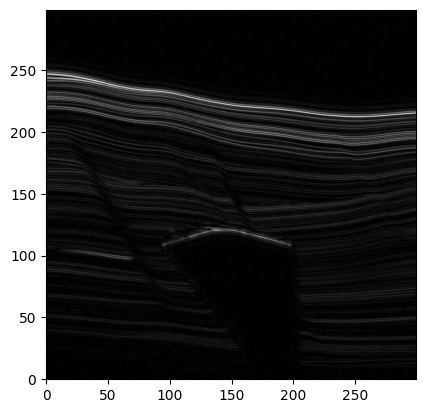

In [9]:
plt.imshow(result[150, :, :].T.compute(), cmap="gray", extent=[local_dataset.iline[0], local_dataset.iline[-1], local_dataset.xline[0], local_dataset.xline[-1]])